In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import sys

In [6]:
# --- 1. Configurações de Ficheiros ---

BASE_DRIVE_PATH = "/content/drive/MyDrive"


RESULTS_FNN_STANDARD_DIR = os.path.join(BASE_DRIVE_PATH, "results_FNN_standard")
RESULTS_FNN_ROBUST_DIR = os.path.join(BASE_DRIVE_PATH, "results_FNN_robust")
RESULTS_SVR_STANDARD_DIR = os.path.join(BASE_DRIVE_PATH, "results_SVR_standard")
RESULTS_SVR_ROBUST_DIR = os.path.join(BASE_DRIVE_PATH, "results_SVR_robust")


FNN_STANDARD_NPY = os.path.join(RESULTS_FNN_STANDARD_DIR, "fnn_predictions_data_standard_20250620_230810.npy")
FNN_ROBUST_NPY = os.path.join(RESULTS_FNN_ROBUST_DIR, "fnn_robust_predictions_data_20250620_224238.npy")
SVM_STANDARD_NPY = os.path.join(RESULTS_SVR_STANDARD_DIR, "svm_standard_predictions_data_20250620_233210.npy")
SVM_ROBUST_NPY = os.path.join(RESULTS_SVR_ROBUST_DIR, "svm_robust_predictions_data_20250620_214345.npy")


GRAPH_SAVE_PATH = os.path.join(BASE_DRIVE_PATH, "model_predictions_comparison.png")

print(FNN_STANDARD_NPY)

/content/drive/MyDrive/results_FNN_standard/fnn_predictions_data_standard_20250620_230810.npy


In [7]:
# --- 2. Carregar Dados ---
print("\n--- A carregar dados dos ficheiros .npy ---")

data_paths = {
    "FNN (StandardScaler)": FNN_STANDARD_NPY,
    "FNN (RobustScaler)": FNN_ROBUST_NPY,
    "SVM (StandardScaler)": SVM_STANDARD_NPY,
    "SVM (RobustScaler)": SVM_ROBUST_NPY,
}

loaded_data = {}
for name, path in data_paths.items():
    if not os.path.exists(path):
        print(f"ERRO: Ficheiro '{path}' para {name} não encontrado")
        sys.exit(1)
    try:
        data = np.load(path)
        loaded_data[name] = data
        print(f"Dados para '{name}' carregados. Dimensão: {data.shape}")
    except Exception as e:
        print(f"ERRO: Falha ao carregar ficheiro '{path}' para {name}: {e}")
        sys.exit(1)



--- A carregar dados dos ficheiros .npy ---
Dados para 'FNN (StandardScaler)' carregados. Dimensão: (9336, 2)
Dados para 'FNN (RobustScaler)' carregados. Dimensão: (9336, 2)
Dados para 'SVM (StandardScaler)' carregados. Dimensão: (9336, 2)
Dados para 'SVM (RobustScaler)' carregados. Dimensão: (9336, 2)



Gráfico combinado salvo em: /content/drive/MyDrive/model_predictions_comparison.png


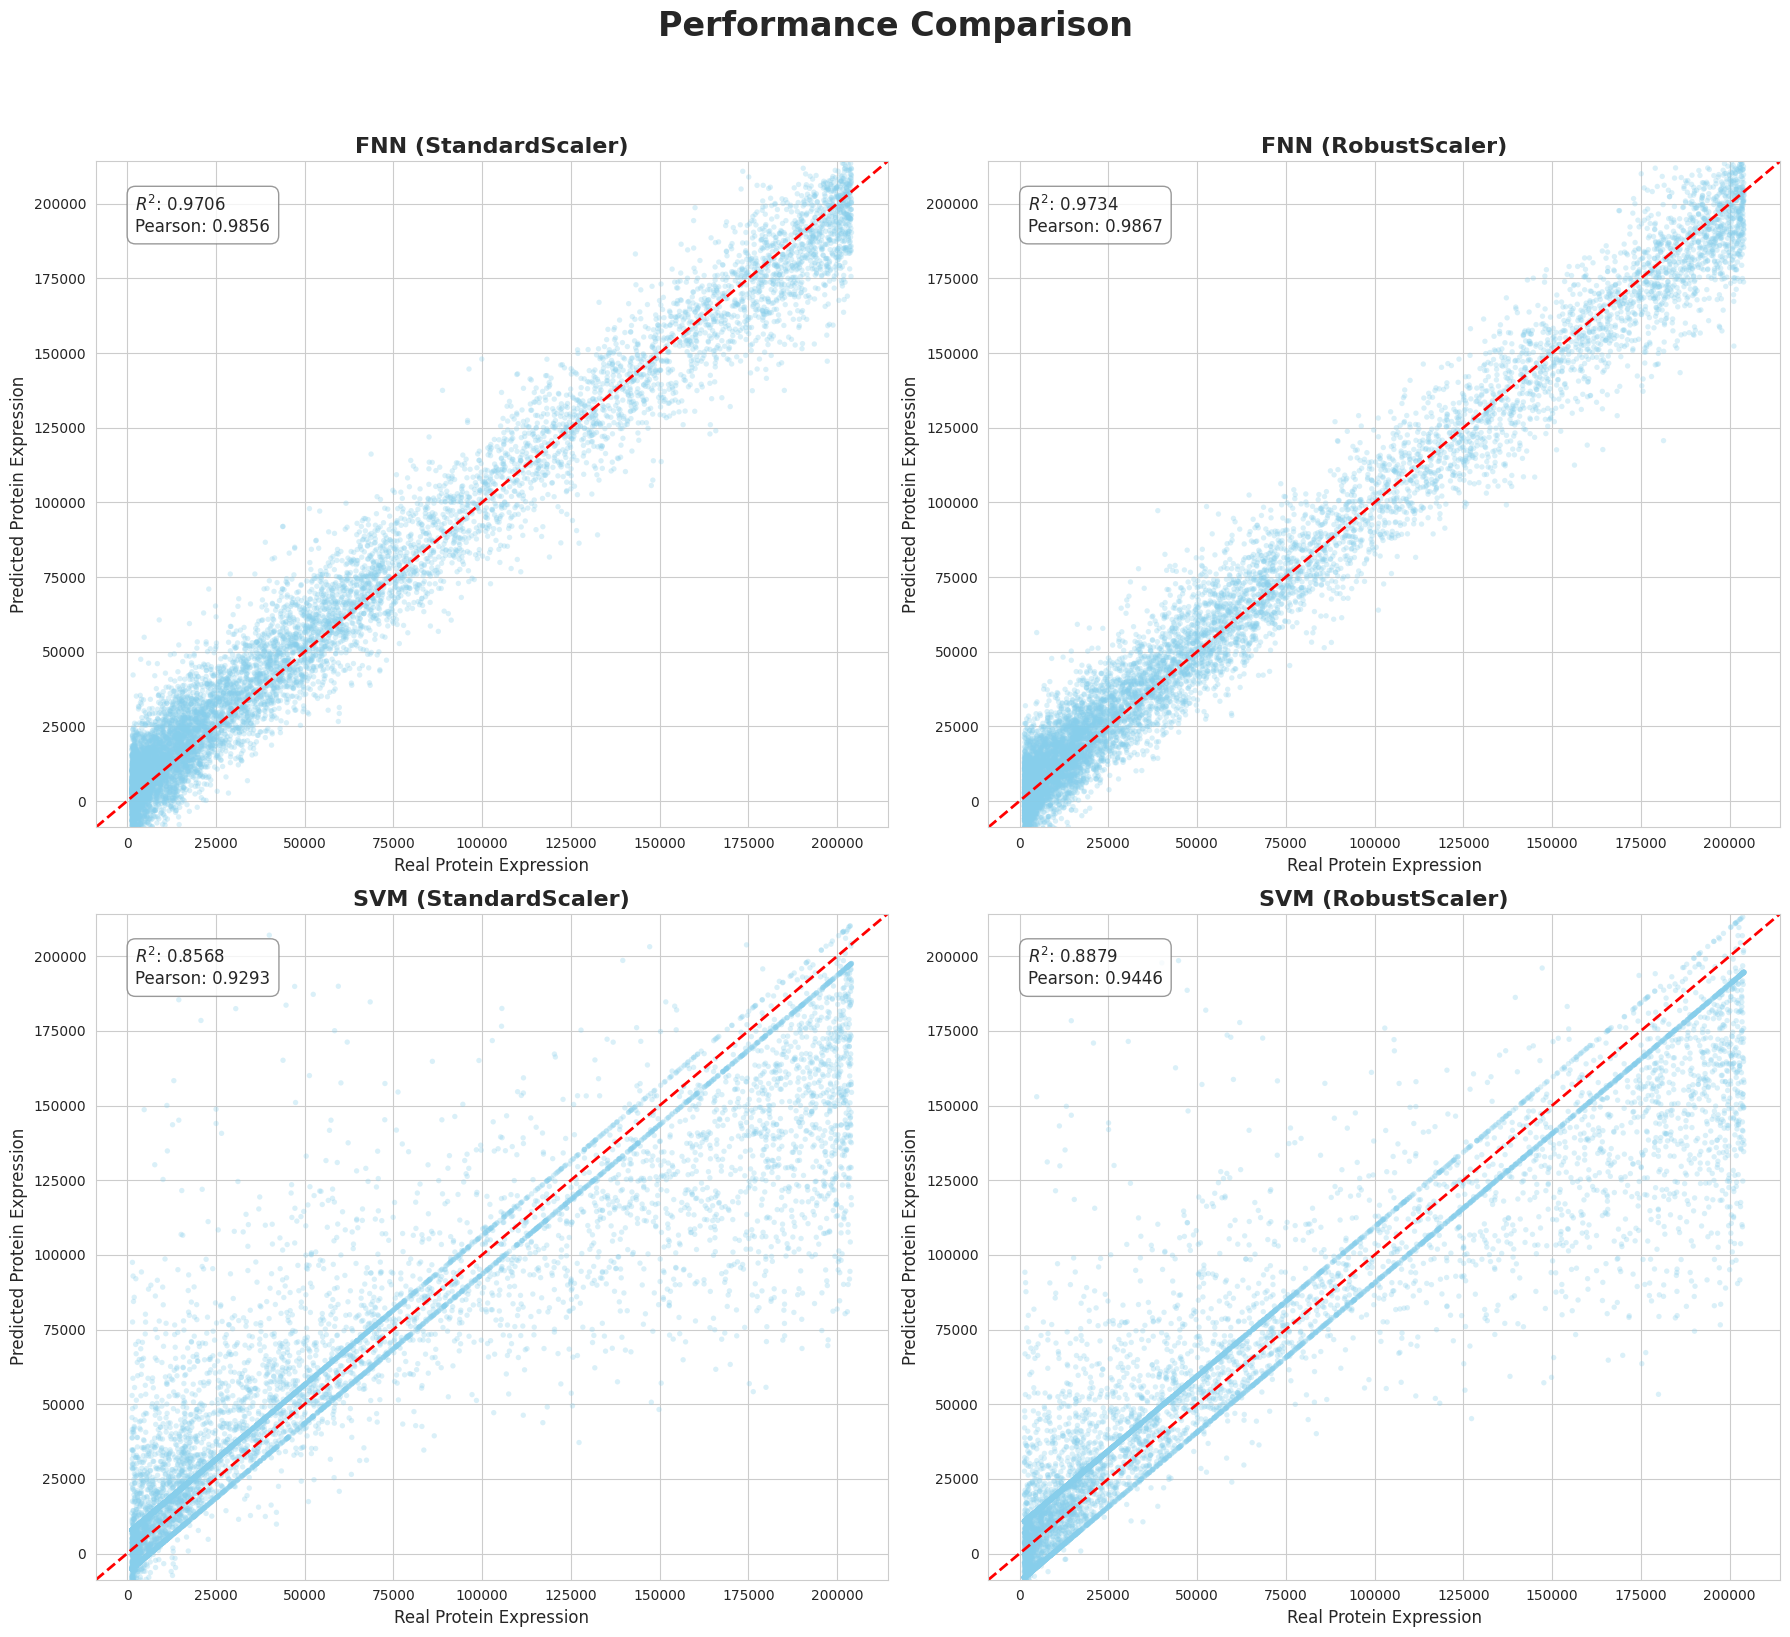


Processo de geração de gráficos concluído.


In [8]:
# --- 3. Gráficos ---



sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

fig, axes = plt.subplots(2, 2, figsize=(18, 16))
axes = axes.flatten()

plot_titles = [
    "FNN (StandardScaler)",
    "FNN (RobustScaler)",
    "SVM (StandardScaler)",
    "SVM (RobustScaler)",
]

all_actual_values = np.concatenate([data[:, 0] for data in loaded_data.values()])
min_val = np.min(all_actual_values)
max_val = np.max(all_actual_values)
plot_range = max_val - min_val
margin = plot_range * 0.05
plot_min = min_val - margin
plot_max = max_val + margin


for i, title in enumerate(plot_titles):
    ax = axes[i]
    if title not in loaded_data:
        ax.set_title(f"{title}\n(Dados não encontrados)", fontsize=14, color='red')
        ax.set_xlabel("Valores Reais")
        ax.set_ylabel("Valores Previstos")
        continue

    actual = loaded_data[title][:, 0]
    predicted = loaded_data[title][:, 1]

    sns.scatterplot(x=actual, y=predicted, ax=ax, alpha=0.3, s=15, edgecolor='none', color='skyblue')

    ax.plot([plot_min, plot_max], [plot_min, plot_max], color='red', linestyle='--', linewidth=2, label='Linha Ideal (y=x)')

    r2 = r2_score(actual, predicted)
    pearson, _ = pearsonr(actual, predicted)

    ax.set_title(f"{title}", fontsize=16, fontweight='bold')
    ax.set_xlabel("Real Protein Expression", fontsize=12)
    ax.set_ylabel("Predicted Protein Expression", fontsize=12)

    ax.text(0.05, 0.95, f'$R^2$: {r2:.4f}\nPearson: {pearson:.4f}',
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8, ec='gray'))

    ax.set_xlim(plot_min, plot_max)
    ax.set_ylim(plot_min, plot_max)
    ax.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

plt.suptitle("Performance Comparison", fontsize=24, fontweight='bold', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.98])

try:
    plt.savefig(GRAPH_SAVE_PATH, dpi=300, bbox_inches='tight')
    print(f"\nGráfico combinado salvo em: {GRAPH_SAVE_PATH}")
except Exception as e:
    print(f"ERRO: Falha ao salvar o gráfico em {GRAPH_SAVE_PATH}: {e}")

plt.show()
print("\nProcesso de geração de gráficos concluído.")
